In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_v=pd.read_csv('./data/training_variants')

In [ ]:
data_t=pd.read_csv("./data/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [ ]:
data_t.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
data_v

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4
...,...,...,...,...
3316,3316,RUNX1,D171N,4
3317,3317,RUNX1,A122*,1
3318,3318,RUNX1,Fusions,1
3319,3319,RUNX1,R80C,4


In [ ]:
data_t.isnull().sum()

ID      0
TEXT    5
dtype: int64

In [ ]:
data_t.isnull().sum()

ID      0
TEXT    5
dtype: int64

In [ ]:
data_v.isnull().sum()

ID           0
Gene         0
Variation    0
Class        0
dtype: int64

In [ ]:
data = pd.merge(data_v,data_t, on="ID",how="left")
data.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
data[data.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [ ]:
# Fill Null values with Gene & Variation 
data.loc[data["TEXT"].isnull(),"TEXT"] = data["Gene"] + " " + data["Variation"]

In [ ]:
#lower case coloumns names
data.columns = data.columns.str.lower()

In [ ]:
print(data['text'][0])

Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10

In [ ]:
# removing punchuations
data["text"] = data["text"].str.replace("[^\w\s]","")
data.head()

,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,Cyclindependent kinases CDKs regulate a variet...
1,1,CBL,W802*,2,Abstract Background Nonsmall cell lung cance...
2,2,CBL,Q249E,2,Abstract Background Nonsmall cell lung cance...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
# remove numeric values
data["text"] = data["text"].str.replace("\d","")
data.head()

,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,Cyclindependent kinases CDKs regulate a variet...
1,1,CBL,W802*,2,Abstract Background Nonsmall cell lung cance...
2,2,CBL,Q249E,2,Abstract Background Nonsmall cell lung cance...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [ ]:
#removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data["text"] = data["text"].apply(lambda x: " ".join(i for i in x.split() if i not in sw))
data.head()

,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,Cyclindependent kinases CDKs regulate variety ...
1,1,CBL,W802*,2,Abstract Background Nonsmall cell lung cancer ...
2,2,CBL,Q249E,2,Abstract Background Nonsmall cell lung cancer ...
3,3,CBL,N454D,3,Recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,Oncogenic mutations monomeric Casitas Blineage...


In [ ]:
#lower case 
data["text"] = data["text"].apply(lambda x: " ".join(i.lower() for i in x.split()))
data.head()

,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,cyclindependent kinases cdks regulate variety ...
1,1,CBL,W802*,2,abstract background nonsmall cell lung cancer ...
2,2,CBL,Q249E,2,abstract background nonsmall cell lung cancer ...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas blineage...


In [ ]:
#tokenization
nltk.download("punkt")
import textblob
from textblob import TextBlob
data["text"] = data["text"].apply(lambda x: TextBlob(x).words)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,"[cyclindependent, kinases, cdks, regulate, var..."
1,1,CBL,W802*,2,"[abstract, background, nonsmall, cell, lung, c..."
2,2,CBL,Q249E,2,"[abstract, background, nonsmall, cell, lung, c..."
3,3,CBL,N454D,3,"[recent, evidence, demonstrated, acquired, uni..."
4,4,CBL,L399V,4,"[oncogenic, mutations, monomeric, casitas, bli..."


In [ ]:
#lemmitazation
from textblob import Word
nltk.download("wordnet")
data["text"] = data["text"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,id,gene,variation,class,text
0,0,FAM58A,Truncating Mutations,1,cyclindependent kinase cdks regulate variety f...
1,1,CBL,W802*,2,abstract background nonsmall cell lung cancer ...
2,2,CBL,Q249E,2,abstract background nonsmall cell lung cancer ...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutation monomeric casitas blineage ...


In [ ]:
data.tail()

,id,gene,variation,class,text
3316,3316,RUNX1,D171N,4,introduction myelodysplastic syndrome md heter...
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndrome md heter...
3318,3318,RUNX1,Fusions,1,the runtrelated transcription factor gene runx...
3319,3319,RUNX1,R80C,4,the runxaml gene frequent target chromosomal t...
3320,3320,RUNX1,K83E,4,the frequent mutation associated leukemia recu...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
import nltk
from collections import Counter
import sklearn
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit, KFold
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, log_loss
import pickle
#import py7zr

In [ ]:
def Vectorize_text(text, max_features=250, ngram_range=(1, 2), min_df=1):
    X_vect = list(text)
    tfidf = TfidfVectorizer(min_df=min_df, ngram_range=ngram_range, max_features=max_features)
    #X_vect = tfidf.fit_transform(text).toarray() 
    X_vect = pd.DataFrame(tfidf.fit_transform(X_vect).toarray(), index=text.index)      
    return X_vect

In [ ]:
tfidf_features = Vectorize_text(data['text'])

In [ ]:
tfidf_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
0,0.006434,0.032874,0.015072,0.005710,0.014012,0.057215,0.000000,0.016658,0.000000,0.000000,0.0,0.000000,0.013980,0.054146,0.000000,0.010368,0.028335,0.028508,0.006460,0.000000,0.084388,0.017320,0.062671,0.063595,0.021996,0.012692,0.000000,0.034095,0.000000,0.0,0.0,0.047690,0.051882,0.062624,0.000000,0.154065,0.365570,0.072884,0.011193,0.000000,...,0.005972,0.000000,0.012227,0.141848,0.007932,0.005886,0.035286,0.025441,0.026101,0.049371,0.023472,0.019614,0.045821,0.023292,0.029862,0.035946,0.034247,0.014782,0.006596,0.0,0.016537,0.0,0.055466,0.010968,0.000000,0.025564,0.065117,0.000000,0.000000,0.025178,0.041353,0.000000,0.0,0.275580,0.015454,0.011449,0.028482,0.010981,0.016532,0.076696
1,0.000000,0.004510,0.012408,0.014103,0.000000,0.064229,0.026027,0.009142,0.008277,0.005365,0.0,0.004505,0.023017,0.085096,0.043277,0.012803,0.000000,0.000000,0.047865,0.000000,0.057211,0.042776,0.020637,0.021814,0.009054,0.000000,0.004933,0.028068,0.000000,0.0,0.0,0.013087,0.007118,0.197622,0.032113,0.000000,0.337550,0.030000,0.009215,0.006862,...,0.009832,0.005263,0.020131,0.148987,0.000000,0.004845,0.008300,0.025132,0.068759,0.022580,0.043476,0.048441,0.020956,0.009588,0.006146,0.000000,0.073301,0.012169,0.005430,0.0,0.095296,0.0,0.024906,0.013544,0.045346,0.021045,0.098966,0.000000,0.000000,0.036273,0.000000,0.000000,0.0,0.061873,0.033926,0.004712,0.009379,0.031640,0.004537,0.037883
2,0.000000,0.004510,0.012408,0.014103,0.000000,0.064229,0.026027,0.009142,0.008277,0.005365,0.0,0.004505,0.023017,0.085096,0.043277,0.012803,0.000000,0.000000,0.047865,0.000000,0.057211,0.042776,0.020637,0.021814,0.009054,0.000000,0.004933,0.028068,0.000000,0.0,0.0,0.013087,0.007118,0.197622,0.032113,0.000000,0.337550,0.030000,0.009215,0.006862,...,0.009832,0.005263,0.020131,0.148987,0.000000,0.004845,0.008300,0.025132,0.068759,0.022580,0.043476,0.048441,0.020956,0.009588,0.006146,0.000000,0.073301,0.012169,0.005430,0.0,0.095296,0.0,0.024906,0.013544,0.045346,0.021045,0.098966,0.000000,0.000000,0.036273,0.000000,0.000000,0.0,0.061873,0.033926,0.004712,0.009379,0.031640,0.004537,0.037883
3,0.006879,0.017574,0.024172,0.012211,0.000000,0.088978,0.005634,0.017810,0.000000,0.000000,0.0,0.017553,0.059788,0.057891,0.000000,0.044341,0.018177,0.018288,0.000000,0.024542,0.159220,0.061728,0.013401,0.033997,0.064673,0.027139,0.019219,0.012151,0.012078,0.0,0.0,0.000000,0.000000,0.011159,0.000000,0.447100,0.227119,0.025975,0.119676,0.000000,...,0.012769,0.000000,0.026145,0.172578,0.000000,0.044051,0.005389,0.010880,0.011163,0.017595,0.018821,0.000000,0.021773,0.043581,0.000000,0.000000,0.036615,0.000000,0.000000,0.0,0.000000,0.0,0.005391,0.000000,0.185092,0.016399,0.069621,0.022033,0.094470,0.006730,0.000000,0.000000,0.0,0.069642,0.038554,0.024481,0.042633,0.093927,0.011784,0.000000
4,0.010293,0.008765,0.000000,0.068514,0.078454,0.124814,0.004215,0.013324,0.000000,0.000000,0.0,0.026264,0.022365,0.031498,0.000000,0.020733,0.009066,0.009121,0.015502,0.000000,0.023824,0.009236,0.005013,0.012717,0.004399,0.015228,0.028757,0.286359,0.000000,0.0,0.0,0.000000,0.000000,0.271329,0.000000,0.017605,0.173868,0.034008,0.125348,0.033338,...,0.004777,0.005114,0.048899,0.144762,0.019034,0.014124,0.012096,0.024419,0.016702,0.004388,0.014081,0.000000,0.008145,0.009316,0.000000,0.000000,0.038351,0.005912,0.000000,0.0,0.030865,0.0,0.036300,0.026319,0.037766,0.032717,0.056093,0.032967,0.010873,0.020139,0.000000,0.005716,0.0,0.060118,0.004121,0.018315,0.004556,0.079054,0.017632,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
svd = TruncatedSVD(n_components=50, n_iter=5, random_state=0)
truncated_tfidf = svd.fit_transform(tfidf_features)
df_tfidf_col_name = ["tfidf_"+str(i) for i in range(50)]
df_tfidf = pd.DataFrame(truncated_tfidf)
df_tfidf.columns = df_tfidf_col_name

In [ ]:
df_tfidf[:4]

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,tfidf_10,tfidf_11,tfidf_12,tfidf_13,tfidf_14,tfidf_15,tfidf_16,tfidf_17,tfidf_18,tfidf_19,tfidf_20,tfidf_21,tfidf_22,tfidf_23,tfidf_24,tfidf_25,tfidf_26,tfidf_27,tfidf_28,tfidf_29,tfidf_30,tfidf_31,tfidf_32,tfidf_33,tfidf_34,tfidf_35,tfidf_36,tfidf_37,tfidf_38,tfidf_39,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49
0,0.675234,-0.089106,-0.020186,-0.331225,-0.083931,0.022666,0.003361,-0.132133,-0.017600,-0.046369,0.029427,0.036129,0.075266,-0.114051,0.006622,-0.053861,0.031652,-0.019542,-0.009587,0.038443,-0.021736,0.278980,0.023942,0.018674,0.035689,0.008369,0.036971,-0.100690,-0.046018,-0.087845,-0.052748,0.094309,-0.010039,0.065564,0.008441,-0.156514,-0.006747,0.008086,0.048188,0.085138,0.089752,-0.023880,-0.012623,-0.017017,0.097272,-0.143501,-0.042120,0.058170,0.004272,0.019630
1,0.716060,-0.143350,-0.257397,0.119165,-0.142804,0.198574,-0.155031,-0.100586,0.102560,-0.022659,-0.012852,-0.107660,-0.077210,0.009882,-0.077125,0.045868,-0.045124,0.024532,-0.000286,0.023153,-0.026345,-0.091596,0.034023,-0.077403,0.036179,0.083116,0.010110,0.051731,0.001118,-0.076210,0.020433,-0.031348,-0.042118,-0.054783,0.001523,0.075253,-0.013928,-0.029987,0.074863,0.020962,-0.057036,0.014033,0.069973,-0.050726,-0.067001,-0.124761,0.003034,-0.118490,0.007877,-0.096068
2,0.716060,-0.143350,-0.257397,0.119165,-0.142804,0.198574,-0.155031,-0.100586,0.102560,-0.022659,-0.012852,-0.107660,-0.077210,0.009882,-0.077125,0.045868,-0.045124,0.024532,-0.000286,0.023153,-0.026345,-0.091596,0.034023,-0.077403,0.036179,0.083116,0.010110,0.051731,0.001118,-0.076210,0.020433,-0.031348,-0.042118,-0.054783,0.001523,0.075253,-0.013928,-0.029987,0.074863,0.020962,-0.057036,0.014033,0.069973,-0.050726,-0.067001,-0.124761,0.003034,-0.118490,0.007877,-0.096068
3,0.722143,-0.060432,-0.203735,0.116733,0.003224,-0.136450,0.016116,-0.029090,-0.012943,0.024492,-0.089666,0.010065,-0.047417,0.025504,-0.014636,0.040758,-0.159438,0.121655,0.143687,0.093569,0.027896,-0.052677,0.047355,-0.108606,0.008711,0.016567,-0.061444,-0.064578,0.090340,0.014866,-0.018641,0.004575,-0.028948,0.134170,-0.084338,-0.044292,-0.046261,0.021195,-0.048577,0.042637,-0.054869,0.017630,0.049385,0.068899,0.165154,-0.024517,0.012067,-0.013776,-0.012981,0.161743


In [ ]:
count_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
count_features = count_vectorizer.fit_transform(data['text'])
count_svd = TruncatedSVD(n_components=50, n_iter=5, random_state=10)
count_bow = count_svd.fit_transform(count_features)
df_bow_col_name = ["bow_"+str(i) for i in range(50)]
df_bow = pd.DataFrame(count_bow)
df_bow.columns = df_bow_col_name

In [ ]:
df_bow[:4]

,bow_0,bow_1,bow_2,bow_3,bow_4,bow_5,bow_6,bow_7,bow_8,bow_9,bow_10,bow_11,bow_12,bow_13,bow_14,bow_15,bow_16,bow_17,bow_18,bow_19,bow_20,bow_21,bow_22,bow_23,bow_24,bow_25,bow_26,bow_27,bow_28,bow_29,bow_30,bow_31,bow_32,bow_33,bow_34,bow_35,bow_36,bow_37,bow_38,bow_39,bow_40,bow_41,bow_42,bow_43,bow_44,bow_45,bow_46,bow_47,bow_48,bow_49
0,131.330370,-53.352542,-13.074853,-4.430841,-6.364559,35.638792,-2.115312,-40.622530,-17.661029,14.417886,-34.799606,10.258157,-5.306907,9.038807,12.339130,-16.234183,57.086398,5.856632,-53.450441,67.511509,21.932903,-5.972063,16.786961,21.144152,-10.788808,-15.853963,5.284537,11.98839,0.866921,18.105150,-13.523653,0.846683,9.887745,-3.632194,4.895005,12.860096,24.620989,-3.237893,2.811110,4.680438,13.808559,-4.736262,-3.927168,-1.581799,-18.275877,-7.116913,-6.028810,-12.070973,-4.690272,-10.802922
1,172.990062,31.723513,-8.306165,-17.255984,-19.226846,35.311264,1.255320,5.278240,-10.973858,-25.382578,-8.513232,7.655669,7.123558,-17.974270,-15.878999,-9.227650,7.017848,10.037393,12.636913,-15.658909,23.159820,6.658388,22.455399,-0.137529,17.821848,10.686839,9.087638,11.46074,5.692527,-12.772840,6.866803,3.635459,-15.019961,-9.099367,-5.409956,2.713650,-0.228278,11.692711,0.271977,5.113090,1.277046,-3.664152,1.291558,0.504874,4.043953,3.793657,0.428968,4.099852,-4.084641,-0.149495
2,172.990062,31.723513,-8.306165,-17.255984,-19.226846,35.311264,1.255320,5.278240,-10.973858,-25.382578,-8.513232,7.655669,7.123558,-17.974270,-15.878999,-9.227650,7.017848,10.037393,12.636913,-15.658909,23.159820,6.658388,22.455399,-0.137529,17.821848,10.686839,9.087638,11.46074,5.692527,-12.772840,6.866803,3.635459,-15.019961,-9.099367,-5.409956,2.713650,-0.228278,11.692711,0.271977,5.113090,1.277046,-3.664152,1.291558,0.504874,4.043953,3.793657,0.428968,4.099852,-4.084641,-0.149495
3,136.299620,26.892079,10.954584,17.823936,-13.079959,9.843002,9.865996,17.289418,-7.941580,-5.716032,-14.401099,9.380101,-7.257872,-38.123278,-4.551223,-20.110313,-18.413508,30.796001,2.990458,8.101021,16.071150,-12.458840,3.537373,-11.633723,-10.409022,10.476552,4.644524,-9.10906,4.297091,-11.056108,8.509602,4.351740,-5.326450,-8.284865,-6.277615,6.263405,8.101726,12.867701,8.882117,-5.322652,14.981813,-7.341081,1.841558,-16.156898,-4.490276,14.389750,-3.061924,-9.673678,-11.402951,4.626703


In [ ]:
df1 = pd.get_dummies(data, columns=['gene', 'variation'], drop_first=True)

In [ ]:
df_all = df1.join(df_tfidf)
df_all = df_all.join(df_bow)

In [ ]:
df_all[:5]

,id,class,text,gene_ACVR1,gene_AGO2,gene_AKT1,gene_AKT2,gene_AKT3,gene_ALK,gene_APC,gene_AR,gene_ARAF,gene_ARID1A,gene_ARID1B,gene_ARID2,gene_ARID5B,gene_ASXL1,gene_ASXL2,gene_ATM,gene_ATR,gene_ATRX,gene_AURKA,gene_AURKB,gene_AXIN1,gene_AXL,gene_B2M,gene_BAP1,gene_BARD1,gene_BCL10,gene_BCL2,gene_BCL2L11,gene_BCOR,gene_BRAF,gene_BRCA1,gene_BRCA2,gene_BRD4,gene_BRIP1,gene_BTK,gene_CARD11,gene_CARM1,...,bow_10,bow_11,bow_12,bow_13,bow_14,bow_15,bow_16,bow_17,bow_18,bow_19,bow_20,bow_21,bow_22,bow_23,bow_24,bow_25,bow_26,bow_27,bow_28,bow_29,bow_30,bow_31,bow_32,bow_33,bow_34,bow_35,bow_36,bow_37,bow_38,bow_39,bow_40,bow_41,bow_42,bow_43,bow_44,bow_45,bow_46,bow_47,bow_48,bow_49
0,0,1,cyclindependent kinase cdks regulate variety f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-34.799606,10.258157,-5.306907,9.038807,12.339130,-16.234183,57.086398,5.856632,-53.450441,67.511509,21.932903,-5.972063,16.786961,21.144152,-10.788808,-15.853963,5.284537,11.988390,0.866921,18.105150,-13.523653,0.846683,9.887745,-3.632194,4.895005,12.860096,24.620989,-3.237893,2.811110,4.680438,13.808559,-4.736262,-3.927168,-1.581799,-18.275877,-7.116913,-6.028810,-12.070973,-4.690272,-10.802922
1,1,2,abstract background nonsmall cell lung cancer ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-8.513232,7.655669,7.123558,-17.974270,-15.878999,-9.227650,7.017848,10.037393,12.636913,-15.658909,23.159820,6.658388,22.455399,-0.137529,17.821848,10.686839,9.087638,11.460740,5.692527,-12.772840,6.866803,3.635459,-15.019961,-9.099367,-5.409956,2.713650,-0.228278,11.692711,0.271977,5.113090,1.277046,-3.664152,1.291558,0.504874,4.043953,3.793657,0.428968,4.099852,-4.084641,-0.149495
2,2,2,abstract background nonsmall cell lung cancer ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-8.513232,7.655669,7.123558,-17.974270,-15.878999,-9.227650,7.017848,10.037393,12.636913,-15.658909,23.159820,6.658388,22.455399,-0.137529,17.821848,10.686839,9.087638,11.460740,5.692527,-12.772840,6.866803,3.635459,-15.019961,-9.099367,-5.409956,2.713650,-0.228278,11.692711,0.271977,5.113090,1.277046,-3.664152,1.291558,0.504874,4.043953,3.793657,0.428968,4.099852,-4.084641,-0.149495
3,3,3,recent evidence demonstrated acquired uniparen...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-14.401099,9.380101,-7.257872,-38.123278,-4.551223,-20.110313,-18.413508,30.796001,2.990458,8.101021,16.071150,-12.458840,3.537373,-11.633723,-10.409022,10.476552,4.644524,-9.109060,4.297091,-11.056108,8.509602,4.351740,-5.326450,-8.284865,-6.277615,6.263405,8.101726,12.867701,8.882117,-5.322652,14.981813,-7.341081,1.841558,-16.156898,-4.490276,14.389750,-3.061924,-9.673678,-11.402951,4.626703
4,4,4,oncogenic mutation monomeric casitas blineage ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-18.788126,2.256408,0.512398,-7.066409,-37.926500,1.311102,20.869573,7.923778,-11.212297,8.113082,18.173585,25.568184,-11.125459,6.151088,17.576581,-2.566421,3.803915,11.125731,17.559349,-16.558744,-2.716495,4.382697,-14.785151,-15.585719,-7.061851,12.016772,-5.602841,8.641292,2.320206,-11.211977,16.237711,-14.080410,16.191380,-0.392074,-1.129669,5.426138,4.093929,5.545008,2.918089,-12.723073


In [ ]:
df_all.shape

(3321, 3361)

In [ ]:
X = df_all.iloc[:,4:]
y = df_all['class']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
y_train = y_train-1

In [ ]:
xgb_param = {'objective': 'multi:softprob',
          'eval_metric' : 'mlogloss',
          'learning_rate' : 0.05,
          'max_depth' : 5,
          'num_class' : 9,
          'nthread': 4,
          'seed': 10}

dtrain_xgb = xgb.DMatrix(X_train, label=y_train)

xbg_result = xgb.cv(xgb_param, 
                    dtrain_xgb, 
                    num_boost_round=300, 
                    nfold=3,
                    stratified=True, 
                    early_stopping_rounds=50, 
                    verbose_eval=100, 
                    show_stdv=True)


[0]	train-mlogloss:2.10988+0.00130395	test-mlogloss:2.12621+0.00196797
[100]	train-mlogloss:0.467501+0.0104573	test-mlogloss:1.05292+0.0204908


In [ ]:
num_round_xgb = len(xbg_result['test-mlogloss-mean'])
print('num boost rounds xgb=' + str(num_round_xgb))

num boost rounds xgb=139


In [ ]:
xgb_cl = xgb.train(xgb_param, dtrain_xgb, num_boost_round=num_round_xgb)

In [ ]:
xgtest = xgb.DMatrix(X_val)
y_pred = xgb_cl.predict(xgtest)

In [ ]:
y_pred

array([[0.05934595, 0.13490526, 0.01135183, ..., 0.5381789 , 0.00586858,
        0.00484559],
       [0.00645722, 0.12436794, 0.00442636, ..., 0.82832   , 0.00170657,
        0.00190167],
       [0.12179592, 0.0817546 , 0.01416347, ..., 0.3810215 , 0.01872359,
        0.21174043],
       ...,
       [0.01621125, 0.02913374, 0.25786766, ..., 0.6649009 , 0.00183195,
        0.00176478],
       [0.01172412, 0.2877358 , 0.00553531, ..., 0.66311455, 0.00480603,
        0.00286784],
       [0.01309571, 0.04267625, 0.0018815 , ..., 0.23273988, 0.00234759,
        0.00155761]], dtype=float32)

In [ ]:
pred_indices = np.argmax(y_pred, axis=1)
print(pred_indices)
classes = np.array(range(1, 10))
preds = classes[pred_indices]

[6 6 6 6 6 0 6 5 6 6 6 4 0 0 6 6 6 0 0 1 4 3 0 3 0 4 0 0 6 3 3 0 6 6 0 4 5
 0 3 1 0 0 3 6 6 6 6 6 3 0 4 3 4 6 4 6 0 6 6 1 6 6 0 6 6 5 0 3 3 4 6 6 3 5
 6 1 6 6 0 3 3 6 1 4 1 6 0 5 6 6 1 5 4 6 6 6 6 6 3 3 6 0 6 6 6 0 1 3 4 5 6
 1 6 3 6 5 6 5 5 6 0 4 3 1 6 6 3 6 5 3 4 4 6 1 0 1 4 6 8 1 3 6 3 0 1 6 6 6
 6 6 0 6 1 4 3 6 6 0 6 6 8 0 8 0 5 3 0 0 6 0 4 6 6 3 6 3 6 3 1 3 6 6 3 3 6
 5 6 6 6 6 6 2 3 3 6 6 6 6 6 3 6 6 0 0 3 3 6 6 6 4 3 0 5 3 0 6 0 0 5 6 6 4
 6 5 1 1 3 6 1 3 0 3 3 6 5 3 3 6 3 4 0 0 6 6 3 5 4 5 3 6 6 3 3 1 6 6 6 5 5
 4 6 6 6 6 5 3 6 0 6 3 6 0 2 3 6 3 4 0 6 0 5 6 5 0 6 1 6 1 5 6 1 1 6 3 6 6
 6 6 6 6 6 0 6 6 3 1 6 6 3 6 3 0 6 3 3 5 3 6 3 3 0 3 0 6 6 6 3 6 1 4 0 4 5
 6 4 3 6 4 4 3 3 6 4 3 0 1 3 6 5 3 4 0 3 3 0 6 6 1 1 6 6 5 6 0 5 1 6 6 6 3
 6 6 4 1 1 0 0 3 1 0 1 6 6 3 3 0 6 4 3 1 1 1 0 0 3 1 1 6 6 6 6 6 4 1 6 0 6
 0 0 1 0 1 6 3 0 3 4 6 3 3 3 3 6 3 6 0 3 6 3 0 6 6 0 3 4 6 6 6 3 6 1 0 6 0
 0 6 6 6 6 6 6 4 3 6 3 6 6 6 0 0 0 3 3 6 6 0 0 6 3 3 6 5 5 0 6 7 0 0 3 0 6
 3 6 4 5 3 6 3 1 6 6 3 0 

In [ ]:
preds

array([7, 7, 7, 7, 7, 1, 7, 6, 7, 7, 7, 5, 1, 1, 7, 7, 7, 1, 1, 2, 5, 4,
       1, 4, 1, 5, 1, 1, 7, 4, 4, 1, 7, 7, 1, 5, 6, 1, 4, 2, 1, 1, 4, 7,
       7, 7, 7, 7, 4, 1, 5, 4, 5, 7, 5, 7, 1, 7, 7, 2, 7, 7, 1, 7, 7, 6,
       1, 4, 4, 5, 7, 7, 4, 6, 7, 2, 7, 7, 1, 4, 4, 7, 2, 5, 2, 7, 1, 6,
       7, 7, 2, 6, 5, 7, 7, 7, 7, 7, 4, 4, 7, 1, 7, 7, 7, 1, 2, 4, 5, 6,
       7, 2, 7, 4, 7, 6, 7, 6, 6, 7, 1, 5, 4, 2, 7, 7, 4, 7, 6, 4, 5, 5,
       7, 2, 1, 2, 5, 7, 9, 2, 4, 7, 4, 1, 2, 7, 7, 7, 7, 7, 1, 7, 2, 5,
       4, 7, 7, 1, 7, 7, 9, 1, 9, 1, 6, 4, 1, 1, 7, 1, 5, 7, 7, 4, 7, 4,
       7, 4, 2, 4, 7, 7, 4, 4, 7, 6, 7, 7, 7, 7, 7, 3, 4, 4, 7, 7, 7, 7,
       7, 4, 7, 7, 1, 1, 4, 4, 7, 7, 7, 5, 4, 1, 6, 4, 1, 7, 1, 1, 6, 7,
       7, 5, 7, 6, 2, 2, 4, 7, 2, 4, 1, 4, 4, 7, 6, 4, 4, 7, 4, 5, 1, 1,
       7, 7, 4, 6, 5, 6, 4, 7, 7, 4, 4, 2, 7, 7, 7, 6, 6, 5, 7, 7, 7, 7,
       6, 4, 7, 1, 7, 4, 7, 1, 3, 4, 7, 4, 5, 1, 7, 1, 6, 7, 6, 1, 7, 2,
       7, 2, 6, 7, 2, 2, 7, 4, 7, 7, 7, 7, 7, 7, 7,

In [ ]:
y_val=y_val+1

In [ ]:
y_val=np.array(y_val)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, log_loss

In [ ]:

print('Log loss: {}'.format(log_loss(y_val,y_pred)))
#print('Accuracy: {}'.format(accuracy_score(y_val, preds)))

Log loss: 0.9131220138190608
Accuracy: 0.031578947368421054


In [ ]:
def predictAndPlot(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column    
    B =(C/C.sum(axis=0))
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


-------------------- Confusion matrix --------------------


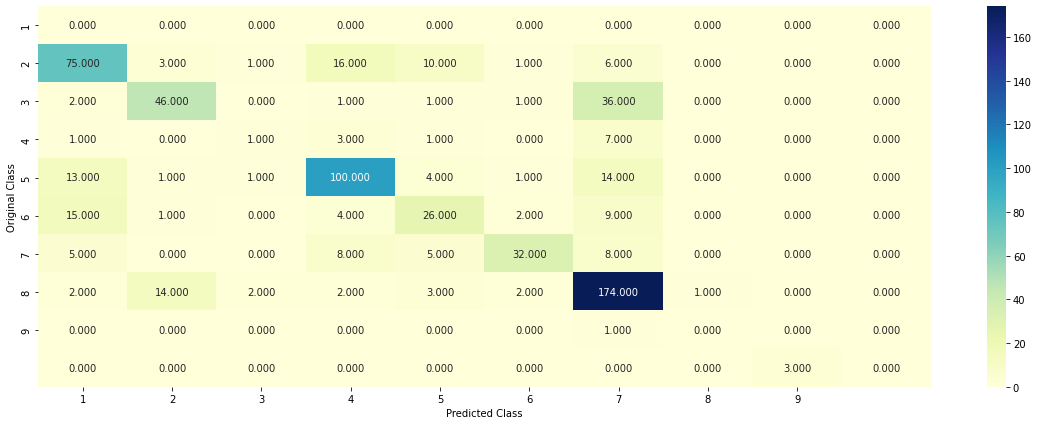

-------------------- Precision matrix (Columm Sum=1) --------------------


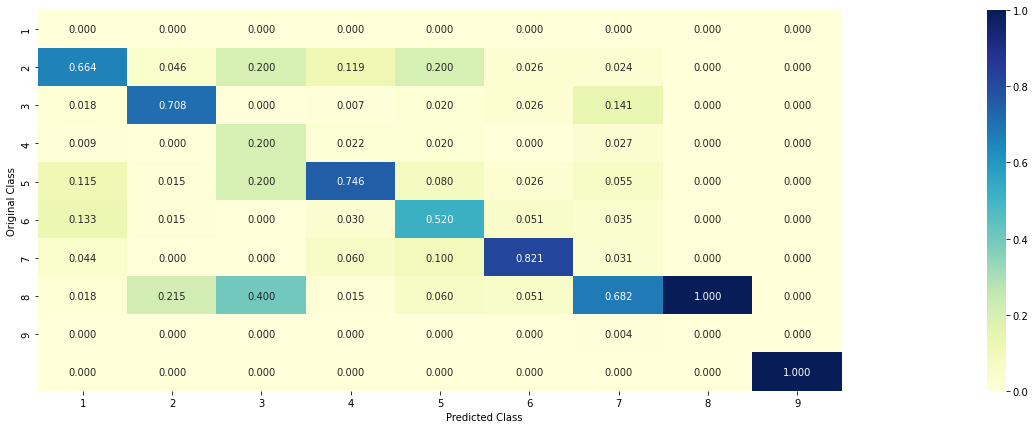

-------------------- Recall matrix (Row sum=1) --------------------


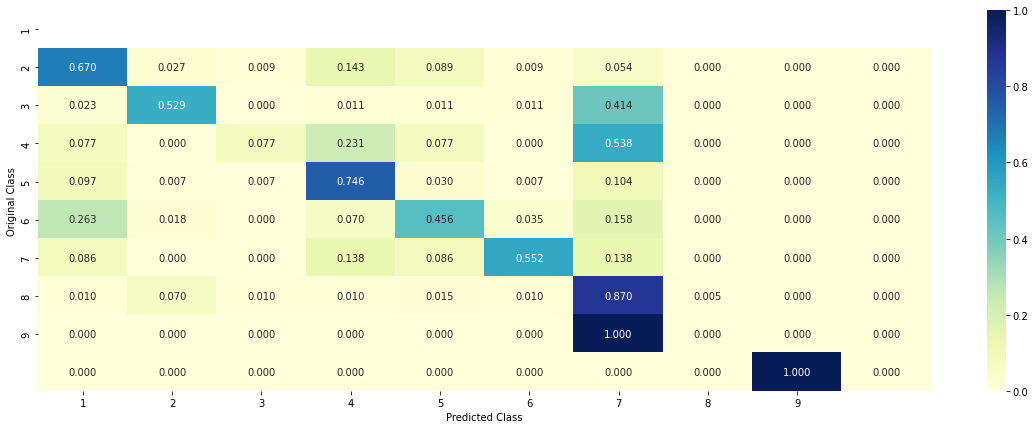

In [ ]:
plot_confusion_matrix(y_val,preds)

LSTM


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import adam_v2
#from keras.optimizers_v1 import Adam
#from keras.optimizers import Adam

In [ ]:
# Use the Keras tokenizer
num_words = 2000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(data['text'].values)

In [ ]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X, maxlen=2000)

In [ ]:
# Build out our simple LSTM
embed_dim = 128
lstm_out = 196

# Model saving callback
ckpt_callback = ModelCheckpoint('keras_model', 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')

model = Sequential()
model.add(Embedding(num_words, embed_dim, input_length = X.shape[1]))
model.add(LSTM(lstm_out, recurrent_dropout=0.2, dropout=0.2))
model.add(Dense(9,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['categorical_crossentropy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 128)         256000    
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 9)                 1773      
                                                                 
Total params: 512,573
Trainable params: 512,573
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.model_selection import train_test_split
Y = pd.get_dummies(data['class']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify=Y)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2656, 2000) (2656, 9)
(665, 2000) (665, 9)


In [ ]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs=8, batch_size=batch_size, validation_split=0.2, 
                    callbacks=[ckpt_callback])

Epoch 1/8
67/67 [==============================] - ETA: 0s - loss: 1.8328 - categorical_crossentropy: 1.8328 
Epoch 00001: val_loss improved from inf to 1.62617, saving model to keras_model
INFO:tensorflow:Assets written to: keras_model/assets


67/67 [==============================] - 819s 12s/step - loss: 1.8328 - categorical_crossentropy: 1.8328 - val_loss: 1.6262 - val_categorical_crossentropy: 1.6262
Epoch 2/8
67/67 [==============================] - ETA: 0s - loss: 1.3944 - categorical_crossentropy: 1.3944 
Epoch 00002: val_loss improved from 1.62617 to 1.36563, saving model to keras_model
INFO:tensorflow:Assets written to: keras_model/assets


INFO:tensorflow:Assets written to: keras_model/assets


67/67 [==============================] - 812s 12s/step - loss: 1.3944 - categorical_crossentropy: 1.3944 - val_loss: 1.3656 - val_categorical_crossentropy: 1.3656
Epoch 3/8
67/67 [==============================] - ETA: 0s - loss: 1.0987 - categorical_crossentropy: 1.0987 
Epoch 00003: val_loss improved from 1.36563 to 1.28413, saving model to keras_model
INFO:tensorflow:Assets written to: keras_model/assets


INFO:tensorflow:Assets written to: keras_model/assets


67/67 [==============================] - 809s 12s/step - loss: 1.0987 - categorical_crossentropy: 1.0987 - val_loss: 1.2841 - val_categorical_crossentropy: 1.2841
Epoch 4/8
67/67 [==============================] - ETA: 0s - loss: 0.9136 - categorical_crossentropy: 0.9136 
Epoch 00004: val_loss improved from 1.28413 to 1.18739, saving model to keras_model
INFO:tensorflow:Assets written to: keras_model/assets


INFO:tensorflow:Assets written to: keras_model/assets


67/67 [==============================] - 806s 12s/step - loss: 0.9136 - categorical_crossentropy: 0.9136 - val_loss: 1.1874 - val_categorical_crossentropy: 1.1874
Epoch 5/8
67/67 [==============================] - ETA: 0s - loss: 0.7763 - categorical_crossentropy: 0.7763 
Epoch 00005: val_loss did not improve from 1.18739
67/67 [==============================] - 800s 12s/step - loss: 0.7763 - categorical_crossentropy: 0.7763 - val_loss: 1.2063 - val_categorical_crossentropy: 1.2063
Epoch 6/8
67/67 [==============================] - ETA: 0s - loss: 0.6868 - categorical_crossentropy: 0.6868 
Epoch 00006: val_loss did not improve from 1.18739
67/67 [==============================] - 800s 12s/step - loss: 0.6868 - categorical_crossentropy: 0.6868 - val_loss: 1.2628 - val_categorical_crossentropy: 1.2628
Epoch 7/8
67/67 [==============================] - ETA: 0s - loss: 0.6297 - categorical_crossentropy: 0.6297 
Epoch 00007: val_loss did not improve from 1.18739
67/67 [=====================

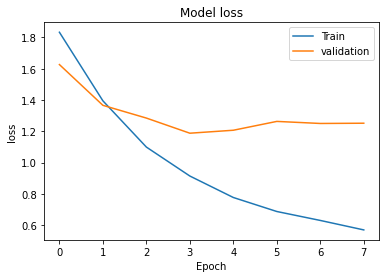

In [ ]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='best')
plt.show()

In [ ]:
model = load_model('keras_model')

In [ ]:
probas = model.predict(X_test)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, log_loss
pred_indices = np.argmax(probas, axis=1)
classes = np.array(range(1, 10))
preds = classes[pred_indices]
print('Log loss: {}'.format(log_loss(classes[np.argmax(Y_test, axis=1)], probas)))
print('Accuracy: {}'.format(accuracy_score(classes[np.argmax(Y_test, axis=1)], preds)))

Log loss: 1.2865540560348925
Accuracy: 0.556390977443609
